In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
rng = np.random.default_rng(1)
s = rng.random(50)

print(np.sum(s))

a = np.array([[i for i in range(1, 5)] for j in range(1,4)])
print(a)

#Суммирование значений в массиве
print(np.sum(a))
print(np.sum(a, axis=0)) #Свертка строк
print(np.sum(a, axis=1)) #Свертка столбцов

#масимум
print(np.min(a))
print(np.min(a, axis=0))
print(np.min(a, axis=1))

#Эквивалентная форма записи
print(a.min())
print(a.min(0))
print(a.min(1))

#Если в данных есть NaN то можно использовать
print(np.nanmin(a))
print(np.nanmin(a, axis=0))
print(np.nanmin(a, axis=1))

25.98570425803768
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
30
[ 3  6  9 12]
[10 10 10]
1
[1 2 3 4]
[1 1 1]
1
[1 2 3 4]
[1 1 1]
1
[1 2 3 4]
[1 1 1]


### Транслирование

На самом деле при сложении массива NumPy и целого числа не происходит сложения элементов массива с этим числом, число сначала становится массивов нуджной размерности и лишь затем складывается с массивом нужной размерности

Эта операция называется транслипованием. Она возникает при сложении массивов разных форм и размеров и подчиняется следующим правилам:
- Если размерности массивов отличаются то форма массива с меньшей стороной дополняется одной с левой стороны
- Если формы массивов не совпадают в каком-то измерении, то если у массива форма = 1, то он растягивается до соответсвия формы второго массива. Элементы при этом дублируются
- Если после применения этих правил в каком-либо измерении размеры отличаются и ни один из них не равен 1, то транслирование НЕВОЗМОЖНО. ИСКЛЮЧЕНИЕ

In [4]:
#Транслирование (Broadcasting)
#Бинарные операции массивов разных форм и размеров

a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

print(a + b)
print(a + 5) #5 изначально как 5, но транслируется в массив из 5 подстраиваясь под размер a

a1 = np.array([[0, 1, 2], [3, 4, 5]]) #Аналогично с многомерными
print(a1 + 5)
b = np.array([[0], [1], [2]])
print(a + b)
#Правила транслирования
#b1 = np.array([5])
#print(b1.ndim, b1.shape)
#print(a1.ndim, a1.shape)
#print(a + b) #b (1,) -> (1,1)

#Примеры

a = np.ones((2,3))
b = np.arange(3)
print(a.ndim, a.shape) # 2, (2,3)
print(b.ndim, b.shape) # 1, (3,).

#Шаг 1 (3,) -> (1,3)
#Шаг 2 растяжение с копированием. (1, 3) -> (2,3)
print(a + b)

a = np.arange(3).reshape((3,1))
print(a)
# b (3,) -> (1, 3) -> дублирование строк
# a(3, 1) -> (3,3) дублирование столбцов
print(a + b)

a = np.ones((3,2))
b = np.arange(3)

#c = a+b - исключение

[5 6 7]
[5 6 7]
[[ 5  6  7]
 [ 8  9 10]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]
2 (2, 3)
1 (3,)
[[1. 2. 3.]
 [1. 2. 3.]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


[5. 5. 5. 5. 5. 5. 5. 5. 5.]
[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]
[5. 5.] (2,) (2, 9)
[[5.]
 [5.]]
[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [ 4.  3.  2.  1.  0. -1. -2. -3. -4.]]


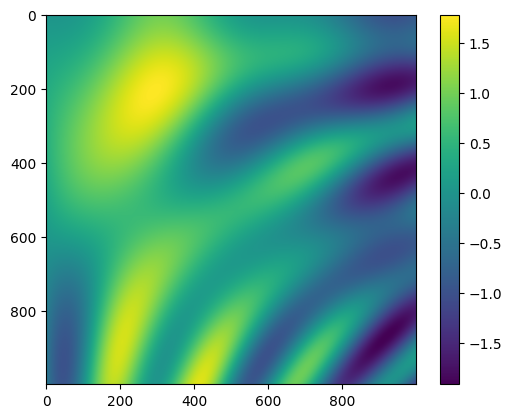

In [5]:
#Построчное центрирование массива
X = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
    [9, 8, 7, 6, 5, 4, 3, 2, 1]
])

Xmean = X.mean(0)
print(Xmean)

Xcenter = X - Xmean
print(Xcenter)

Xmean1 = X.mean(1)
print(Xmean1, Xmean1.shape, X.shape) # (1,2) не приводится к 2,9
Xmean1 = Xmean1[:, np.newaxis] #Можно и решейпнуть
print(Xmean1)

Xcenter1 = X - Xmean1
print(Xcenter)


x = np.linspace(0, 5, 1000)
y = np.linspace(0, 5, 1000)[:, np.newaxis] #Сразу вектор-столбец

z = np.sin(x)**3 + np.cos(20 - x*y)*np.sin(y)

plt.imshow(z)
plt.colorbar()
plt.show()

In [6]:
#Сравнение

x = np.array([1, 2, 3, 4, 5])

print(x < 3) #Сравнивае по элементно
print(np.less(x, 3)) #Аналогично другие сравнения

print(np.sum(x<4)) # число элементов меньше 4

y = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
])

print(np.sum(y<4, axis=0))
print(np.sum(y<4, axis=1))

[ True  True False False False]
[ True  True False False False]
3
[1 1 1 0 0]
[3 0]


In [7]:
#Маски и булевы массивы

x = np.array([1, 2, 3, 4, 5])
y = print(x<3)
print(x[x<3])

print(bin(42))
print(bin(59))

print(bin(42 & 59))

[ True  True False False False]
[1 2]
0b101010
0b111011
0b101010


In [10]:
#Векторизация индексов
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
index = [1, 5, 7]
print(x[index])
index = [[1, 5, 7], [2, 4, 8]]
print(x[index]) #Результат соответсвует структуре индекса !!!

print("\n")
x = np.arange(12).reshape((3,4))
print(x)
print(x[2])
print(x[2, [2,0,1]])
print(x[1:, [2,0,1]])

#Запись

x = np.arange(10)

i = np.array([2, 1, 8, 4])
x[i] = 999


[2 6 8]
[[2 6 8]
 [3 5 9]]


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 8  9 10 11]
[10  8  9]
[[ 6  4  5]
 [10  8  9]]


In [11]:
#Сортировки
print(np.sort(x)) #Быстрее на больших данных

#Структурированные массивы
data = np.zeros(4, dtype={
    "names":("name", "age"), "formats":("U10", "i4")
})

print(data)
print(data.dtype)

name = ["name1","name1", "name1", "name4"]
age = [10, 20, 30, 40]

data["name"] = name
data["age"] = age
print(data)

print(data["age"] > 20)

#Массивы записей
data_rec = data.view(np.recarray)
print(data_rec)
print(data_rec[0]) #Вновь можем обращатся по индексам

[  0   3   5   6   7   9 999 999 999 999]
[('', 0) ('', 0) ('', 0) ('', 0)]
[('name', '<U10'), ('age', '<i4')]
[('name1', 10) ('name1', 20) ('name1', 30) ('name4', 40)]
[False False  True  True]
[('name1', 10) ('name1', 20) ('name1', 30) ('name4', 40)]
('name1', 10)
